# Library importation

In [1]:
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as spy
%matplotlib inline
import copy
import math

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Pandas display settings - columns

# Display all columns
pd.set_option("display.max_columns", None)

---

## Data ingestion 

In [4]:
# Load dataset
data = pd.read_excel("InsurancePremiumDefault.xlsx",sheet_name='premium')

---

Let's rename the variables for ease of programming

In [5]:
# Column rename dictionary
renamed_columns = {
    'id': 'ID',
    'perc_premium_paid_by_cash_credit': 'Perc_premium_paid_in_cash',
    'age_in_days': 'Age_in_days',
    'Count_3-6_months_late': 'Late_premium_payment_3-6_months',
    'Count_6-12_months_late': 'Late_premium_payment_6-12_months',
    'Count_more_than_12_months_late': 'Late_premium_payment_>12_months',
    'Marital Status': 'Marital_Status',
    'Veh_Owned': 'Vehicles_Owned',
    'No_of_dep': 'No_of_dependents',
    'risk_score': 'Risk_score',
    'no_of_premiums_paid': 'No_of_premiums_paid',
    'sourcing_channel': 'Sourcing_channel',
    'residence_area_type': 'Customer_demographic',
    'premium': 'Premium_payment',
    'default': 'Default'
}

# Rename dataframe columns names
data = data.rename(columns = renamed_columns)

---

**Convert Pandas Objects to Category type**

In [6]:
# Convert variables with "object" type to "category" type
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].astype("category") 

# Confirm if there no variables with "object" type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ID                                79853 non-null  int64   
 1   Perc_premium_paid_in_cash         79853 non-null  float64 
 2   Age_in_days                       79853 non-null  int64   
 3   Income                            79853 non-null  int64   
 4   Late_premium_payment_3-6_months   79853 non-null  int64   
 5   Late_premium_payment_6-12_months  79853 non-null  int64   
 6   Late_premium_payment_>12_months   79853 non-null  int64   
 7   Marital_Status                    79853 non-null  int64   
 8   Vehicles_Owned                    79853 non-null  int64   
 9   No_of_dependents                  79853 non-null  int64   
 10  Accomodation                      79853 non-null  int64   
 11  Risk_score                        79853 non-null  floa

**Dropping ID variable**

In [7]:
data.drop(columns="ID", axis=1, inplace=True)

---

**Create a list of numerical variables**

In [8]:
numerical_vars = [
    'Perc_premium_paid_in_cash', 'Age_in_days', 'Income', 'Risk_score',
    'No_of_premiums_paid', 'Premium_payment'
]

**Create a list of categorical variables**

In [9]:
categorical_vars = [
    'Late_premium_payment_3-6_months', 'Late_premium_payment_6-12_months',
    'Late_premium_payment_>12_months', 'Marital_Status', 'Vehicles_Owned',
    'No_of_dependents', 'Accomodation', 'Sourcing_channel',
    'Customer_demographic', 'Default'
]

---

---

# Feature Engineering

---

Data pre-proprocessing is a vital stage in the data preparation for model building.

To prevent loss or corruption of the data, let's clone the dataframe first.

In [10]:
# Create copy of dataframe
df = copy.deepcopy(data)

---

## Missing Value Treatment

From the analysis in Part1 above, since in the dataset there **No Missing Values** then <font color='red'>**Missing Value Treatment** will **NOT** be required</font> . 

For completeness, let's verify again

In [11]:
def missing_val_chk(data):
    """
    This function to checks for missing values 
    and generates a summary.
    """
    if data.isnull().sum().any() == True:
        # Number of missing in each column
        missing_vals = pd.DataFrame(data.isnull().sum().sort_values(
            ascending=False)).rename(columns={0: '# missing'})

        # Create a percentage missing
        missing_vals['percent'] = ((missing_vals['# missing'] / len(data)) *
                                   100).round(decimals=3)

        # Remove rows with 0
        missing_vals = missing_vals[missing_vals['# missing'] != 0].dropna()

        # display missing value dataframe
        print("The missing values summary")
        display(missing_vals)
    else:
        print("There are NO missing values in the dataset")

In [12]:
# Check for missing values using define function
missing_val_chk(df)

There are NO missing values in the dataset


---

## Variable Transformation

In Part 1, we have noticed that the dataset consists of series of numerical and categorical variables.

The **numerical variables** are skewed and have many outliers while the **categorical variables** are predominantly ordinal with numerical nature.

Let's focus on the numerical variables first.

### Numerical Variables

Since the numerical variables consist of many outliers, let's bin each variable into categories. This will accomodate for the range of outliers without losing any data.

#### Perc_premium_paid_in_cash

In [13]:
df['Perc_premium_paid_in_cash'].describe()

count    79853.000000
mean         0.314288
std          0.334915
min          0.000000
25%          0.034000
50%          0.167000
75%          0.538000
max          1.000000
Name: Perc_premium_paid_in_cash, dtype: float64

Since Percentage Premium Pay in Cash ranges from 0(min) to 1(max), let's split into intervals of 0.1

In [14]:
# Bin Perc_premium_paid_in_cash variable
df.Perc_premium_paid_in_cash = pd.cut(
    df.Perc_premium_paid_in_cash,
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    labels=[
        "0 - 0.1", "0.1 - 0.2", "0.2 - 0.3", "0.3 - 0.4", "0.4 - 0.5",
        "0.5 - 0.6", "0.6 - 0.7", "0.7 - 0.8", "0.8 - 0.9", "0.9 - 1"
    ],
    include_lowest=1)
# Preview head of dataframe
df.head()

,Perc_premium_paid_in_cash,Age_in_days,Income,Late_premium_payment_3-6_months,Late_premium_payment_6-12_months,Late_premium_payment_>12_months,Marital_Status,Vehicles_Owned,No_of_dependents,Accomodation,Risk_score,No_of_premiums_paid,Sourcing_channel,Customer_demographic,Premium_payment,Default
0,0.3 - 0.4,11330,90050,0,0,0,0,3,3,1,98.810,8,A,Rural,5400,1
1,0 - 0.1,30309,156080,0,0,0,1,3,1,1,99.066,3,A,Urban,11700,1
2,0 - 0.1,16069,145020,1,0,0,0,1,1,1,99.170,14,C,Urban,18000,1
3,0 - 0.1,23733,187560,0,0,0,1,1,1,0,99.370,13,A,Urban,13800,1
4,0.8 - 0.9,19360,103050,7,3,4,0,2,1,0,98.800,15,A,Urban,7500,0


Distribution of binned **Perc_premium_paid_in_cash**

In [15]:
df["Perc_premium_paid_in_cash"].value_counts()

Perc_premium_paid_in_cash
0 - 0.1      32999
0.1 - 0.2     9569
0.9 - 1       8814
0.2 - 0.3     6454
0.3 - 0.4     5076
0.4 - 0.5     4300
0.5 - 0.6     3614
0.6 - 0.7     3172
0.8 - 0.9     2987
0.7 - 0.8     2868
Name: count, dtype: int64

---

#### Age_in_days

This variable shows the age of the policy holder in days, lets create a new Age variable in terms of years.

In [16]:
# Create a new Age variable (year rounded)
# since a leap year occurs every 4 year, use 365.25 days per year
df["Age_in_years"] = np.round(df.Age_in_days / 365.25)

In [17]:
# Check to see if "Age_in_years" added to dataframe
df.head()

,Perc_premium_paid_in_cash,Age_in_days,Income,Late_premium_payment_3-6_months,Late_premium_payment_6-12_months,Late_premium_payment_>12_months,Marital_Status,Vehicles_Owned,No_of_dependents,Accomodation,Risk_score,No_of_premiums_paid,Sourcing_channel,Customer_demographic,Premium_payment,Default,Age_in_years
0,0.3 - 0.4,11330,90050,0,0,0,0,3,3,1,98.810,8,A,Rural,5400,1,31.0
1,0 - 0.1,30309,156080,0,0,0,1,3,1,1,99.066,3,A,Urban,11700,1,83.0
2,0 - 0.1,16069,145020,1,0,0,0,1,1,1,99.170,14,C,Urban,18000,1,44.0
3,0 - 0.1,23733,187560,0,0,0,1,1,1,0,99.370,13,A,Urban,13800,1,65.0
4,0.8 - 0.9,19360,103050,7,3,4,0,2,1,0,98.800,15,A,Urban,7500,0,53.0


In [18]:
df["Age_in_years"].describe()

count    79853.000000
mean        51.607404
std         14.270484
min         21.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        103.000000
Name: Age_in_years, dtype: float64

Since "Age in Years" ranges from 21(min) to 103(max), let's split into decades from 20 to 70 and >70.

In [19]:
# Bin Age_in_years variable
df["Age_in_years"] = pd.cut(
    df["Age_in_years"],
    bins=[20, 30, 40, 50, 60, 70, 103],
    labels=["20 - 30", "30 - 40", "40 - 50", "50 - 60", "60 - 70", ">70"])
# Preview head of dataframe
df.head()

,Perc_premium_paid_in_cash,Age_in_days,Income,Late_premium_payment_3-6_months,Late_premium_payment_6-12_months,Late_premium_payment_>12_months,Marital_Status,Vehicles_Owned,No_of_dependents,Accomodation,Risk_score,No_of_premiums_paid,Sourcing_channel,Customer_demographic,Premium_payment,Default,Age_in_years
0,0.3 - 0.4,11330,90050,0,0,0,0,3,3,1,98.810,8,A,Rural,5400,1,30 - 40
1,0 - 0.1,30309,156080,0,0,0,1,3,1,1,99.066,3,A,Urban,11700,1,>70
2,0 - 0.1,16069,145020,1,0,0,0,1,1,1,99.170,14,C,Urban,18000,1,40 - 50
3,0 - 0.1,23733,187560,0,0,0,1,1,1,0,99.370,13,A,Urban,13800,1,60 - 70
4,0.8 - 0.9,19360,103050,7,3,4,0,2,1,0,98.800,15,A,Urban,7500,0,50 - 60


Distribution of binned **Age_in_years**

In [20]:
df["Age_in_years"].value_counts()

Age_in_years
40 - 50    19678
50 - 60    18900
60 - 70    13918
30 - 40    13718
>70         8181
20 - 30     5458
Name: count, dtype: int64

Drop Age_in_days column

In [21]:
df.drop(columns = "Age_in_days", inplace = True)

---

#### Income

This variable shows the income of the policy holders

In [22]:
df.Income.describe()

count    7.985300e+04
mean     2.088472e+05
std      4.965826e+05
min      2.403000e+04
25%      1.080100e+05
50%      1.665600e+05
75%      2.520900e+05
max      9.026260e+07
Name: Income, dtype: float64

Since Income ranges from 24,030(min) to 90,262,600(max), let's create a new varible in '000 

In [23]:
# Create a new Income variable ('000)
df["Income_'000"] = df.Income / 1000

In [24]:
# Check to see if "Income_'000" added to dataframe
df.head()

,Perc_premium_paid_in_cash,Income,Late_premium_payment_3-6_months,Late_premium_payment_6-12_months,Late_premium_payment_>12_months,Marital_Status,Vehicles_Owned,No_of_dependents,Accomodation,Risk_score,No_of_premiums_paid,Sourcing_channel,Customer_demographic,Premium_payment,Default,Age_in_years,Income_'000
0,0.3 - 0.4,90050,0,0,0,0,3,3,1,98.810,8,A,Rural,5400,1,30 - 40,90.05
1,0 - 0.1,156080,0,0,0,1,3,1,1,99.066,3,A,Urban,11700,1,>70,156.08
2,0 - 0.1,145020,1,0,0,0,1,1,1,99.170,14,C,Urban,18000,1,40 - 50,145.02
3,0 - 0.1,187560,0,0,0,1,1,1,0,99.370,13,A,Urban,13800,1,60 - 70,187.56
4,0.8 - 0.9,103050,7,3,4,0,2,1,0,98.800,15,A,Urban,7500,0,50 - 60,103.05


In [25]:
df["Income_'000"].describe()

count    79853.000000
mean       208.847171
std        496.582597
min         24.030000
25%        108.010000
50%        166.560000
75%        252.090000
max      90262.600000
Name: Income_'000, dtype: float64

Since "Income_'000" ranges from 24(min) to 90262(max), let's split into intervals of 40 from 20 to 300 and >300.

In [26]:
# Bin Income_'000 variable
df["Income_'000"] = pd.cut(
    df["Income_'000"],
    bins=[20, 60, 100, 140, 180, 220, 260, 300, 90262.60],
    labels=["20 - 60", "60 - 100", "100 - 140", "140 - 180", "180 - 220", "220 - 260", "260 - 300", ">300"])
# Preview head of dataframe
df.head()

,Perc_premium_paid_in_cash,Income,Late_premium_payment_3-6_months,Late_premium_payment_6-12_months,Late_premium_payment_>12_months,Marital_Status,Vehicles_Owned,No_of_dependents,Accomodation,Risk_score,No_of_premiums_paid,Sourcing_channel,Customer_demographic,Premium_payment,Default,Age_in_years,Income_'000
0,0.3 - 0.4,90050,0,0,0,0,3,3,1,98.810,8,A,Rural,5400,1,30 - 40,60 - 100
1,0 - 0.1,156080,0,0,0,1,3,1,1,99.066,3,A,Urban,11700,1,>70,140 - 180
2,0 - 0.1,145020,1,0,0,0,1,1,1,99.170,14,C,Urban,18000,1,40 - 50,140 - 180
3,0 - 0.1,187560,0,0,0,1,1,1,0,99.370,13,A,Urban,13800,1,60 - 70,180 - 220
4,0.8 - 0.9,103050,7,3,4,0,2,1,0,98.800,15,A,Urban,7500,0,50 - 60,100 - 140


Distribution of binned **Income_'000**

In [27]:
df["Income_'000"].value_counts()

Income_'000
100 - 140    14096
>300         13824
60 - 100     12025
140 - 180    11952
180 - 220    10455
220 - 260     7569
20 - 60       4998
260 - 300     4934
Name: count, dtype: int64

Drop Income column

In [28]:
df.drop(columns = "Income", inplace = True)

---

#### Risk_score

This variable shows the Risk score of the policy holders

In [29]:
df.Risk_score.describe()

count    79853.000000
mean        99.067243
std          0.725892
min         91.900000
25%         98.830000
50%         99.180000
75%         99.520000
max         99.890000
Name: Risk_score, dtype: float64

Since Risk_score ranges from 91.9(min) to 99.89(max), let's split into intervals of 91 to 100

In [30]:
# Bin Risk_score variable
df["Risk_score"] = pd.cut(df["Risk_score"],
                          bins=[91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
                          labels=[
                              "91 - 92", "92 - 93", "93 - 94", "94 - 95",
                              "95 - 96", "96 - 97", "97 - 98", "98 - 99",
                              "99 - 100"
                          ])
# Preview head of dataframe
df.head()

,Perc_premium_paid_in_cash,Late_premium_payment_3-6_months,Late_premium_payment_6-12_months,Late_premium_payment_>12_months,Marital_Status,Vehicles_Owned,No_of_dependents,Accomodation,Risk_score,No_of_premiums_paid,Sourcing_channel,Customer_demographic,Premium_payment,Default,Age_in_years,Income_'000
0,0.3 - 0.4,0,0,0,0,3,3,1,98 - 99,8,A,Rural,5400,1,30 - 40,60 - 100
1,0 - 0.1,0,0,0,1,3,1,1,99 - 100,3,A,Urban,11700,1,>70,140 - 180
2,0 - 0.1,1,0,0,0,1,1,1,99 - 100,14,C,Urban,18000,1,40 - 50,140 - 180
3,0 - 0.1,0,0,0,1,1,1,0,99 - 100,13,A,Urban,13800,1,60 - 70,180 - 220
4,0.8 - 0.9,7,3,4,0,2,1,0,98 - 99,15,A,Urban,7500,0,50 - 60,100 - 140


Distribution of binned **Risk_score**

In [31]:
df["Risk_score"].value_counts()

Risk_score
99 - 100    52584
98 - 99     22245
97 - 98      3442
96 - 97       944
95 - 96       313
94 - 95       165
93 - 94        93
92 - 93        62
91 - 92         5
Name: count, dtype: int64

---

#### No_of_premiums_paid

This variable shows the Number of Premiums paid by the policy holders

In [32]:
df.No_of_premiums_paid.describe()

count    79853.000000
mean        10.863887
std          5.170687
min          2.000000
25%          7.000000
50%         10.000000
75%         14.000000
max         60.000000
Name: No_of_premiums_paid, dtype: float64

Since No_of_premiums_paid ranges from 2(min) to 60(max), let's split into intervals of 5 from 0 to 20 and >20

In [33]:
# Bin No_of_premiums_paid variable
df["No_of_premiums_paid"] = pd.cut(
    df["No_of_premiums_paid"],
    bins=[0, 5, 10, 15, 20, 60],
    labels=["0 - 5", "5 - 10", "10 - 15", "15 - 20", ">20"])
# Preview head of dataframe
df.head()

,Perc_premium_paid_in_cash,Late_premium_payment_3-6_months,Late_premium_payment_6-12_months,Late_premium_payment_>12_months,Marital_Status,Vehicles_Owned,No_of_dependents,Accomodation,Risk_score,No_of_premiums_paid,Sourcing_channel,Customer_demographic,Premium_payment,Default,Age_in_years,Income_'000
0,0.3 - 0.4,0,0,0,0,3,3,1,98 - 99,5 - 10,A,Rural,5400,1,30 - 40,60 - 100
1,0 - 0.1,0,0,0,1,3,1,1,99 - 100,0 - 5,A,Urban,11700,1,>70,140 - 180
2,0 - 0.1,1,0,0,0,1,1,1,99 - 100,10 - 15,C,Urban,18000,1,40 - 50,140 - 180
3,0 - 0.1,0,0,0,1,1,1,0,99 - 100,10 - 15,A,Urban,13800,1,60 - 70,180 - 220
4,0.8 - 0.9,7,3,4,0,2,1,0,98 - 99,10 - 15,A,Urban,7500,0,50 - 60,100 - 140


Distribution of binned **No_of_premiums_paid**

In [34]:
df["No_of_premiums_paid"].value_counts()

No_of_premiums_paid
5 - 10     33473
10 - 15    23806
0 - 5       9594
15 - 20     9114
>20         3866
Name: count, dtype: int64

---

#### Premium_payment

This variable shows the present Premium payment by the policy holders

In [35]:
df.Premium_payment.describe()

count    79853.000000
mean     10924.507533
std       9401.676542
min       1200.000000
25%       5400.000000
50%       7500.000000
75%      13800.000000
max      60000.000000
Name: Premium_payment, dtype: float64

Since Premium_payment ranges from 1,200(min) to 60,000(max), let's split into intervals of 5,000 from 0 to 20,000 and >20,000

In [36]:
# Bin Premium_payment variable
df["Premium_payment"] = pd.cut(
    df["Premium_payment"],
    bins=[0, 5000, 10000, 15000, 20000, 60000],
    labels=["0 - 5000", "5000 - 10000", "10000 - 15000", "15000 - 20000", ">20000"])
# Preview head of dataframe
df.head()

,Perc_premium_paid_in_cash,Late_premium_payment_3-6_months,Late_premium_payment_6-12_months,Late_premium_payment_>12_months,Marital_Status,Vehicles_Owned,No_of_dependents,Accomodation,Risk_score,No_of_premiums_paid,Sourcing_channel,Customer_demographic,Premium_payment,Default,Age_in_years,Income_'000
0,0.3 - 0.4,0,0,0,0,3,3,1,98 - 99,5 - 10,A,Rural,5000 - 10000,1,30 - 40,60 - 100
1,0 - 0.1,0,0,0,1,3,1,1,99 - 100,0 - 5,A,Urban,10000 - 15000,1,>70,140 - 180
2,0 - 0.1,1,0,0,0,1,1,1,99 - 100,10 - 15,C,Urban,15000 - 20000,1,40 - 50,140 - 180
3,0 - 0.1,0,0,0,1,1,1,0,99 - 100,10 - 15,A,Urban,10000 - 15000,1,60 - 70,180 - 220
4,0.8 - 0.9,7,3,4,0,2,1,0,98 - 99,10 - 15,A,Urban,5000 - 10000,0,50 - 60,100 - 140


Distribution of binned **Premium_payment**

In [37]:
df["Premium_payment"].value_counts()

Premium_payment
5000 - 10000     32616
0 - 5000         16757
10000 - 15000    13380
>20000           11207
15000 - 20000     5893
Name: count, dtype: int64

---

### Categorical Variables

Within this Insurance policy holder dataset,the categorical variables are predominantly nominal in nature while being numerical in value. These values must be converted to a non-numerical nominal designation as the presence of numerical value may indicate weightage in model building steps later down.

Let's convert each categorical value to its nominal non-numerical form.

#### Default (Target Varible)

In [38]:
df['Default'] = df['Default'].replace({0: 'Default', 1: 'Not_Default'})

In [39]:
df['Default'].value_counts()

Default
Not_Default    74855
Default         4998
Name: count, dtype: int64

---

#### Marital_Status

In [40]:
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})

In [41]:
df['Marital_Status'].value_counts()

Marital_Status
Unmarried    40032
Married      39821
Name: count, dtype: int64

---

#### Vehicles_Owned

In [42]:
df['Vehicles_Owned'] = df['Vehicles_Owned'].replace({1: 'One', 2: 'Two', 3:'Three'})

In [43]:
df['Vehicles_Owned'].value_counts()

Vehicles_Owned
One      26746
Three    26587
Two      26520
Name: count, dtype: int64

---

#### No_of_dependents

In [44]:
df['No_of_dependents'] = df['No_of_dependents'].replace({1: 'One', 2: 'Two', 3:'Three', 4:'Four'})

In [45]:
df['No_of_dependents'].value_counts()

No_of_dependents
Three    20215
Two      19902
Four     19896
One      19840
Name: count, dtype: int64

---

#### Accomodation

In [46]:
df['Accomodation'] = df['Accomodation'].replace({0: 'Rented', 1: 'Owned'})

In [47]:
df['Accomodation'].value_counts()

Accomodation
Owned     40030
Rented    39823
Name: count, dtype: int64

---

The following three categorical variables, indicating the number of time late premium payments across different time intervals, will be dealt uniquely since for a policy holder to be covered under any insurance policy they must complete their premium payments. 

* Late_premium_payment_3-6_months
* Late_premium_payment_6-12_months
* Late_premium_payment_>12_months

Based on the distribution of the variables in seen in Part 1, the majority of the policy holder paid their premium on time. Therefore these variables will be dealt using binning into buckets of either "Paid on time" or "Paid late".

In [48]:
df["Late_premium_payment_3-6_months"] = np.where(
    (df["Late_premium_payment_3-6_months"] == 0), "Paid_on_time", "Paid_late")

df["Late_premium_payment_6-12_months"] = np.where(
    (df["Late_premium_payment_6-12_months"] == 0), "Paid_on_time", "Paid_late")

df["Late_premium_payment_>12_months"] = np.where(
    (df["Late_premium_payment_>12_months"] == 0), "Paid_on_time", "Paid_late")

# Preview head of dataframe
df.head()

,Perc_premium_paid_in_cash,Late_premium_payment_3-6_months,Late_premium_payment_6-12_months,Late_premium_payment_>12_months,Marital_Status,Vehicles_Owned,No_of_dependents,Accomodation,Risk_score,No_of_premiums_paid,Sourcing_channel,Customer_demographic,Premium_payment,Default,Age_in_years,Income_'000
0,0.3 - 0.4,Paid_on_time,Paid_on_time,Paid_on_time,Unmarried,Three,Three,Owned,98 - 99,5 - 10,A,Rural,5000 - 10000,Not_Default,30 - 40,60 - 100
1,0 - 0.1,Paid_on_time,Paid_on_time,Paid_on_time,Married,Three,One,Owned,99 - 100,0 - 5,A,Urban,10000 - 15000,Not_Default,>70,140 - 180
2,0 - 0.1,Paid_late,Paid_on_time,Paid_on_time,Unmarried,One,One,Owned,99 - 100,10 - 15,C,Urban,15000 - 20000,Not_Default,40 - 50,140 - 180
3,0 - 0.1,Paid_on_time,Paid_on_time,Paid_on_time,Married,One,One,Rented,99 - 100,10 - 15,A,Urban,10000 - 15000,Not_Default,60 - 70,180 - 220
4,0.8 - 0.9,Paid_late,Paid_late,Paid_late,Unmarried,Two,One,Rented,98 - 99,10 - 15,A,Urban,5000 - 10000,Default,50 - 60,100 - 140


---

**Convert Pandas Objects to Category type**

In [49]:
# Convert variables with "object" type to "category" type
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].astype("category") 

# Confirm if there no variables with "object" type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Perc_premium_paid_in_cash         79853 non-null  category
 1   Late_premium_payment_3-6_months   79853 non-null  category
 2   Late_premium_payment_6-12_months  79853 non-null  category
 3   Late_premium_payment_>12_months   79853 non-null  category
 4   Marital_Status                    79853 non-null  category
 5   Vehicles_Owned                    79853 non-null  category
 6   No_of_dependents                  79853 non-null  category
 7   Accomodation                      79853 non-null  category
 8   Risk_score                        79853 non-null  category
 9   No_of_premiums_paid               79853 non-null  category
 10  Sourcing_channel                  79853 non-null  category
 11  Customer_demographic              79853 non-null  cate

---

Let's double check if there are any missing values after variable transformation has been completed

In [50]:
missing_val_chk(df)

There are NO missing values in the dataset


---

## EDA

### Univariate Analysis

In [51]:
def bar_chart(data):
    """
    This function below generates a `bar chart` showing
    the `distribution of the categorical varible input`.
    * The function also `generates an image file` of the plot.
    * The function takes the Pandas series as the input.
    * It `computes the frequency of each unique element` and 
      displays the distribution of the elements to in horizontal bars.
    * The `percentage of each bar` is also calculated and placed to 
      the right end of each bar.
    * `sns.despine()` - removes the upper and right border of the chart
    * For each horizontal bar the width is calculated as a percentage of
      the entire quanta of datapoints.
    * The percentage is annotated to the each bar by plotting the cardinal locations.

    """
    
    # Create a horizontal count plot while sorting variables in descending order
    g=sns.countplot(y=data)
    # Remove the top and right spines from plot
    sns.despine()
    # length of the column
    col_length = len(data) 
    for p in g.patches:
        # percentage of each class of the category
        percentage = '{:.1f}%'.format(100 * p.get_width()/col_length)
        # width of the plot
        x = p.get_x() + p.get_width() + 0.02
        # height of the plot
        y = p.get_y() + p.get_height()/2
        # annotate the percentage
        g.annotate(percentage, (x, y), size = 12) 
        plt.title("Distribution of {}".format(data.name),loc="center",fontsize = 22)
    plt.show()
    # Line separator
    print('--'*55)


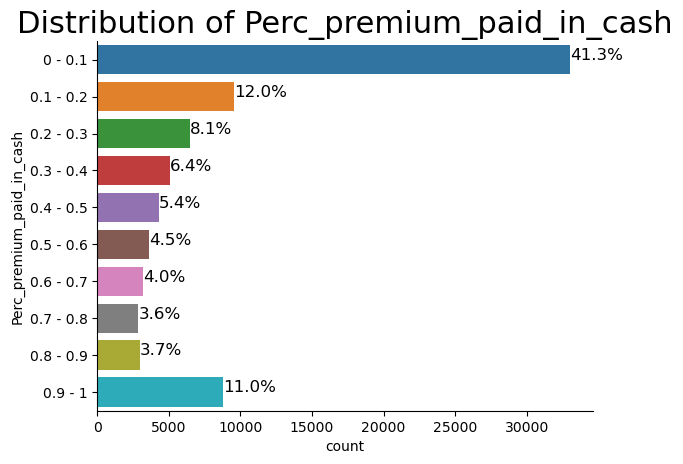

--------------------------------------------------------------------------------------------------------------


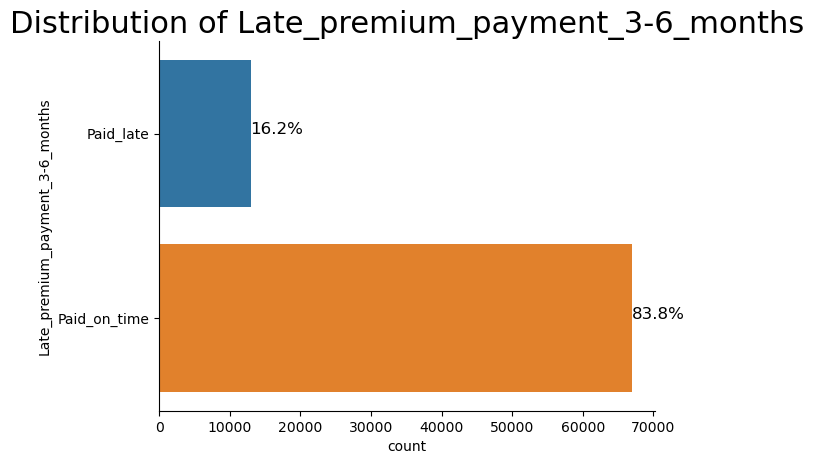

--------------------------------------------------------------------------------------------------------------


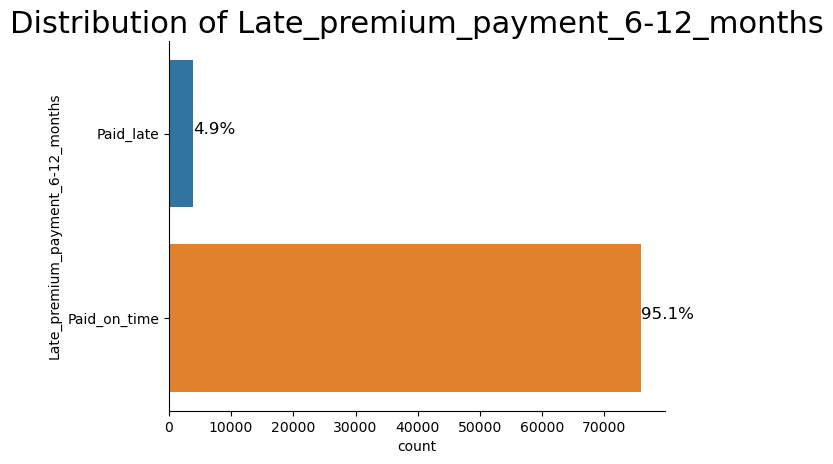

--------------------------------------------------------------------------------------------------------------


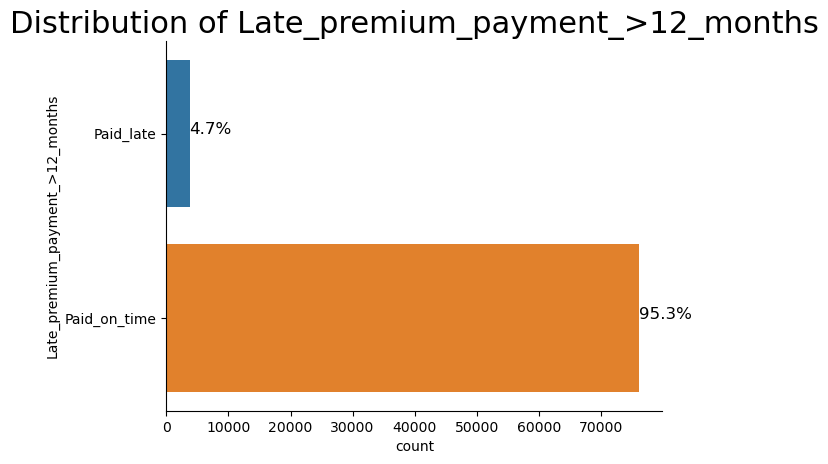

--------------------------------------------------------------------------------------------------------------


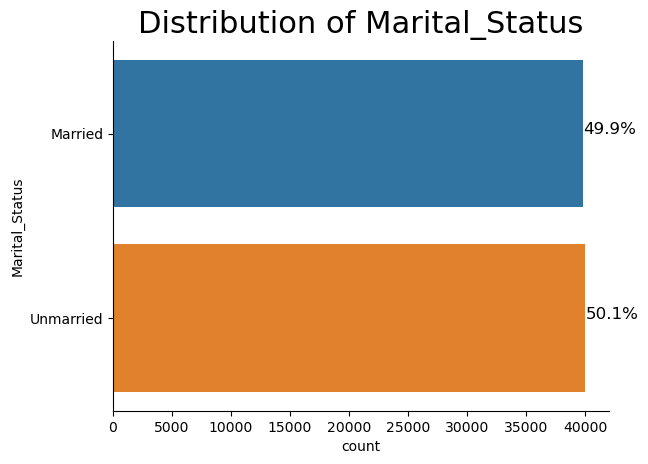

--------------------------------------------------------------------------------------------------------------


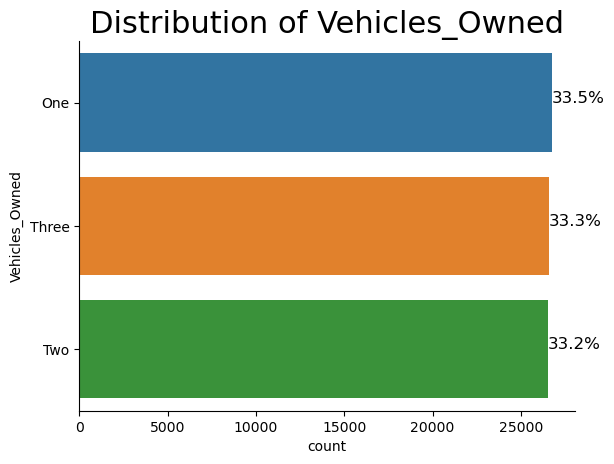

--------------------------------------------------------------------------------------------------------------


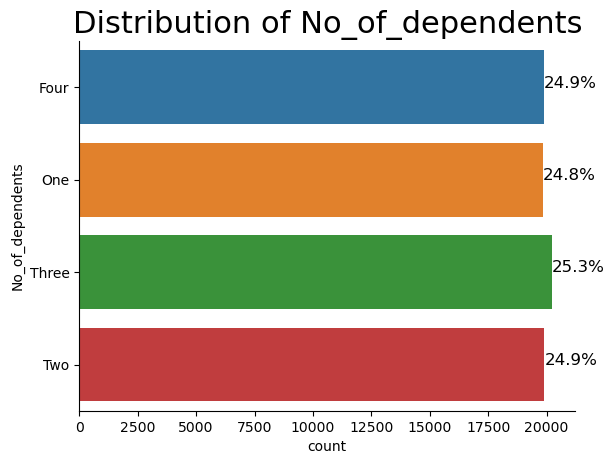

--------------------------------------------------------------------------------------------------------------


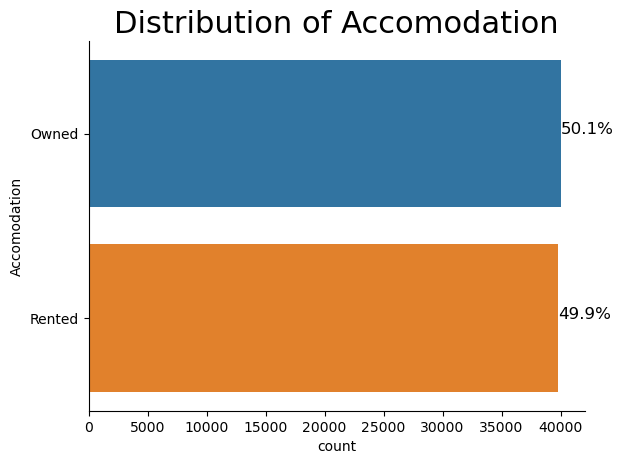

--------------------------------------------------------------------------------------------------------------


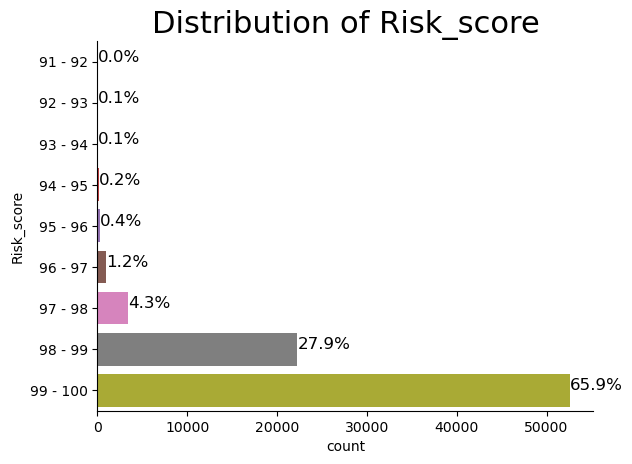

--------------------------------------------------------------------------------------------------------------


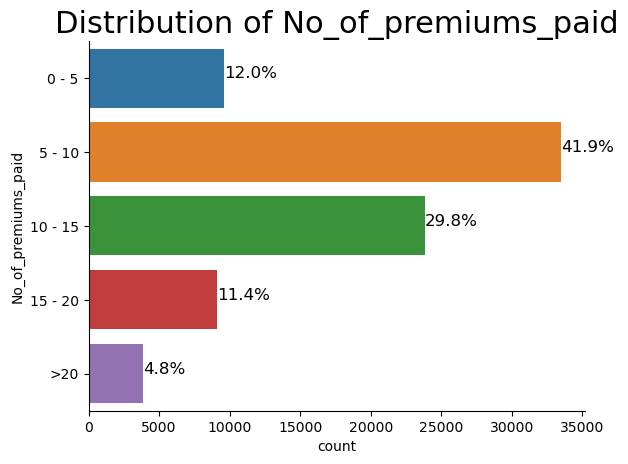

--------------------------------------------------------------------------------------------------------------


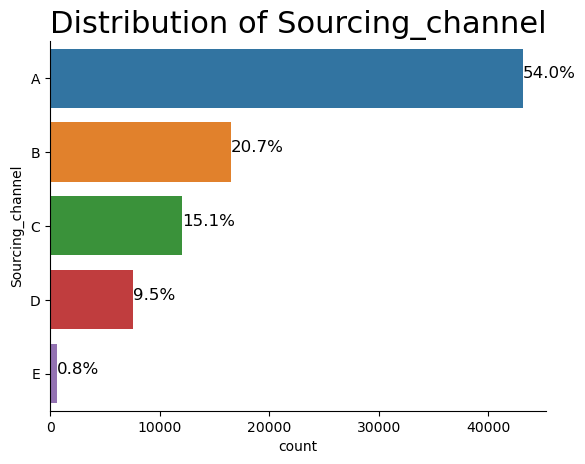

--------------------------------------------------------------------------------------------------------------


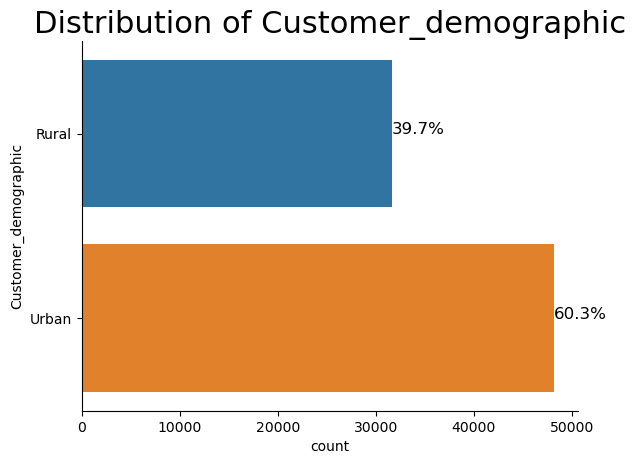

--------------------------------------------------------------------------------------------------------------


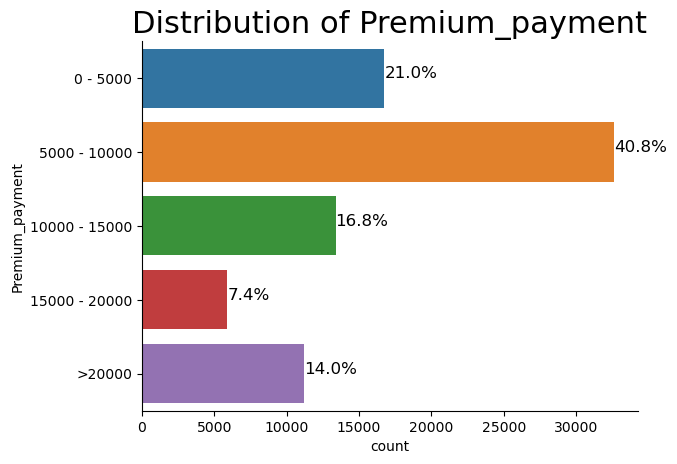

--------------------------------------------------------------------------------------------------------------


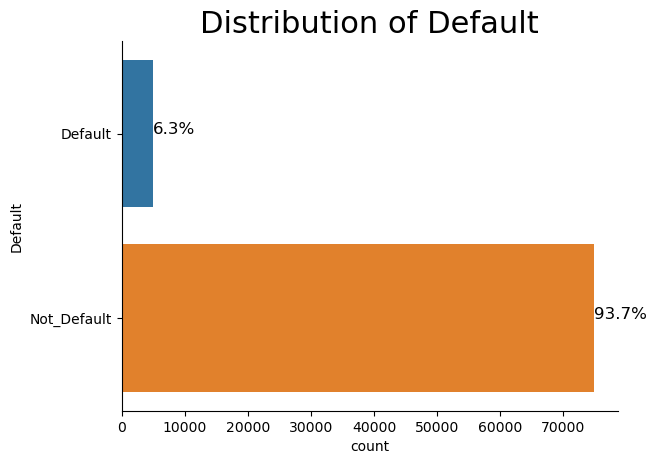

--------------------------------------------------------------------------------------------------------------


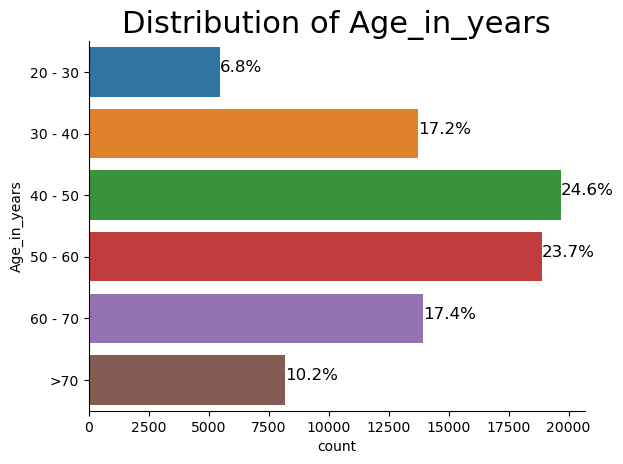

--------------------------------------------------------------------------------------------------------------


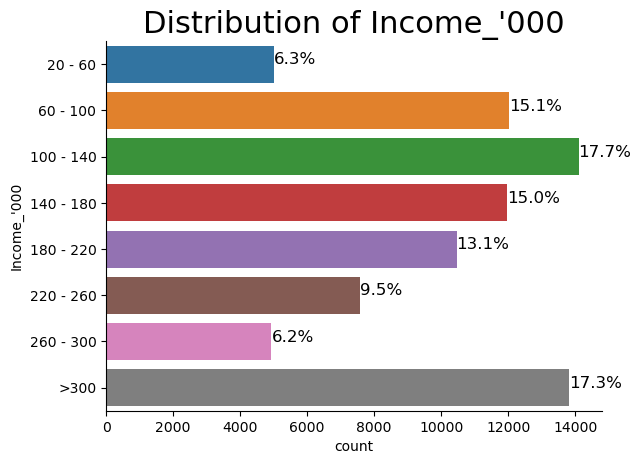

--------------------------------------------------------------------------------------------------------------


In [52]:
for each_var in df.columns:
    plt.figure()
    bar_chart(data=df[each_var])

**Observations:**
* The bulk of the policy holders made their insurance premium payments in non-cash transactions.  **41%** of all the policy holders made up to 10% of their premium payments in cash. This could indicate that the Insurance agency offers a variety of convenient payment options .
* The majority of the policy holders made their premiums payments on time. 
* The policy holders disctribution in this dataset is more or less evenly balanced across `Marital Status`, `Number of vehicles owned` ,  `No_of_dependents` & `Accomodation`.
* The policy holders typcially have `Risk scores` between 98 and 100, where the majority fall with 99-100.
* The bulk of the policy holders have 5-10 premiums paid up to date. The least number of policy holder have more than 20 premiums paid up to date.
* The bulk of the policy holders were sourced using `Channel A` (54%) while the least was `Channel E`
* The majority of the policy holders reside in `Urban` residence types (~60%)
* The majority of the policy holders have policy premiums within 5,000-10,000 (40.8%) while the least has 15,000-20,000 (7.4%).
* 6.3% of the policy holders defaulted on their premium payments. The data is `heavily imbalanced`
* This dataset has has the bulk of policy holders within the ages of 30-70 years of age with the largest age group being 40-50 years old. There are small groups of policy holders within the ages of 20-30 **(6.8%)** and greater than 70  years **(10.2%)**
* There is a major disparity in the income ranges in this dataset, the largest income groups are those within 100-140K and those greater than 300K. There are significant quantity of high earning policy holders.

---

### Bivariate Analysis

In [53]:
def stacked_plot1(x, flag=True):
    sns.set(palette='nipy_spectral')
    table_values = pd.crosstab(x, df['Default'], margins=True)
    if flag == True:
        display(table_values)

    table_norm = pd.crosstab(x, df['Default'], normalize='index')
    table_norm.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.show()
    print('-' * 80)

Default,Default,Not_Default,All
Perc_premium_paid_in_cash,,,
0 - 0.1,663,32336,32999
0.1 - 0.2,285,9284,9569
0.2 - 0.3,245,6209,6454
0.3 - 0.4,277,4799,5076
0.4 - 0.5,293,4007,4300
0.5 - 0.6,319,3295,3614
0.6 - 0.7,317,2855,3172
0.7 - 0.8,395,2473,2868
0.8 - 0.9,463,2524,2987


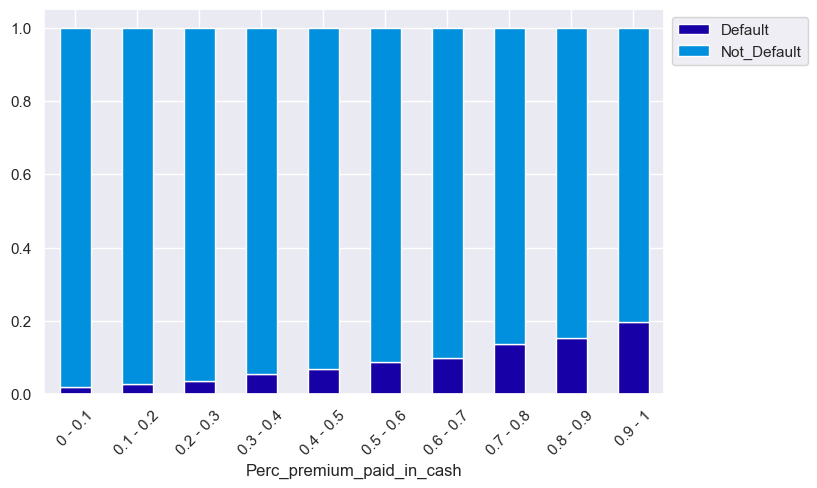

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Late_premium_payment_3-6_months,,,
Paid_late,2311,10644,12955
Paid_on_time,2687,64211,66898
All,4998,74855,79853


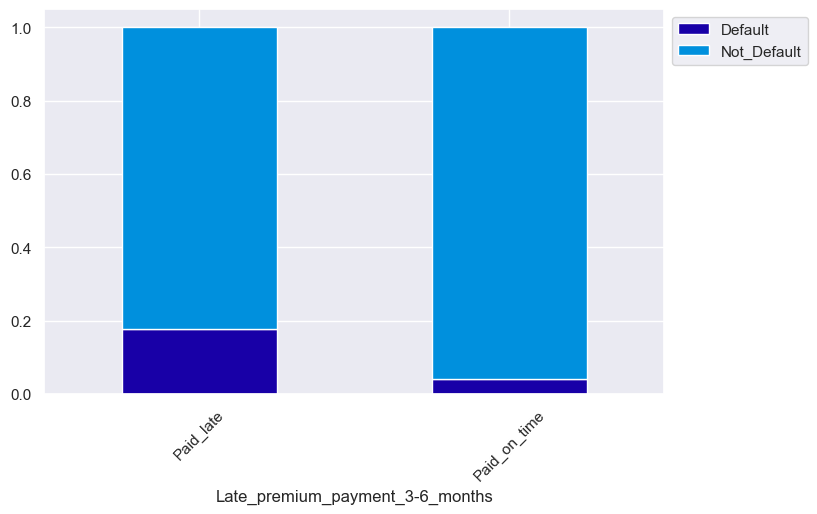

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Late_premium_payment_6-12_months,,,
Paid_late,1493,2432,3925
Paid_on_time,3505,72423,75928
All,4998,74855,79853


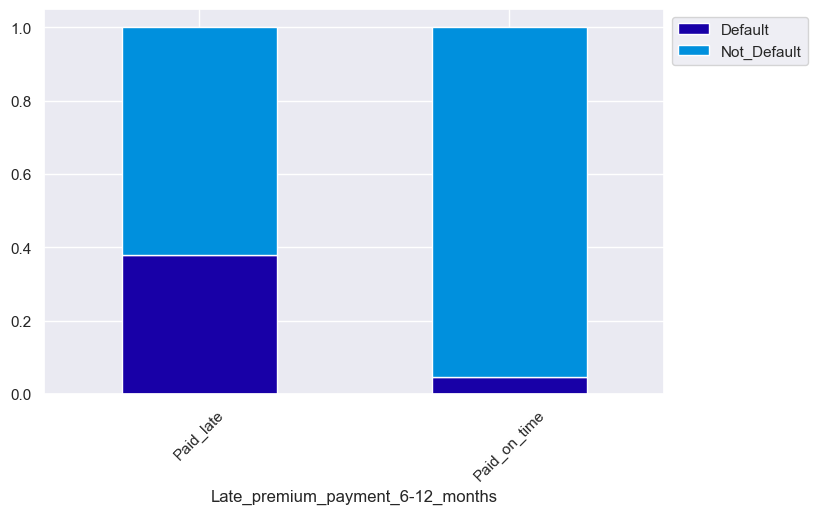

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Late_premium_payment_>12_months,,,
Paid_late,1188,2530,3718
Paid_on_time,3810,72325,76135
All,4998,74855,79853


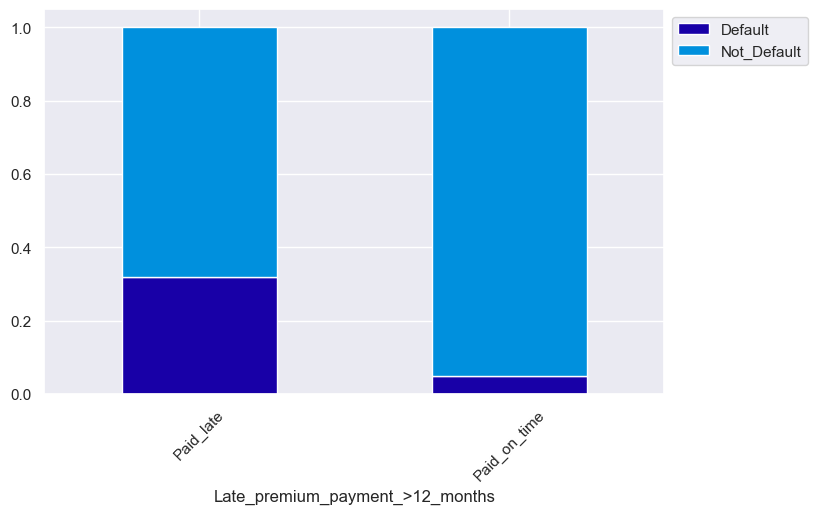

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Marital_Status,,,
Married,2427,37394,39821
Unmarried,2571,37461,40032
All,4998,74855,79853


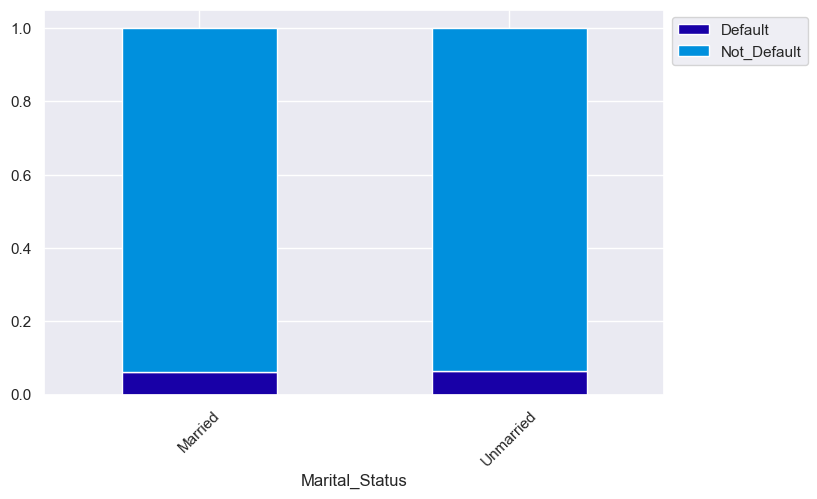

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Vehicles_Owned,,,
One,1668,25078,26746
Three,1652,24935,26587
Two,1678,24842,26520
All,4998,74855,79853


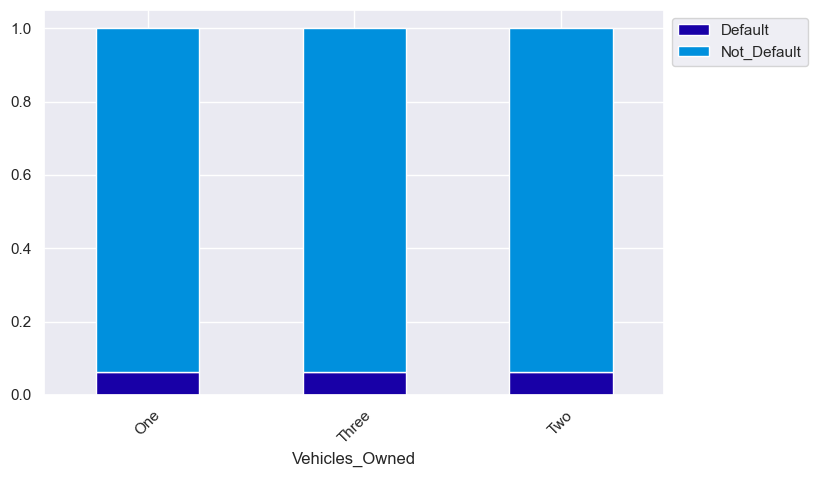

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
No_of_dependents,,,
Four,1267,18629,19896
One,1190,18650,19840
Three,1283,18932,20215
Two,1258,18644,19902
All,4998,74855,79853


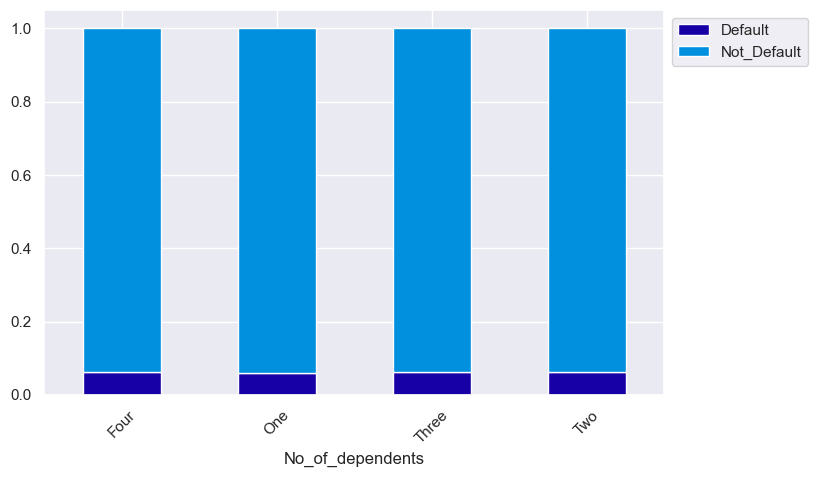

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Accomodation,,,
Owned,2545,37485,40030
Rented,2453,37370,39823
All,4998,74855,79853


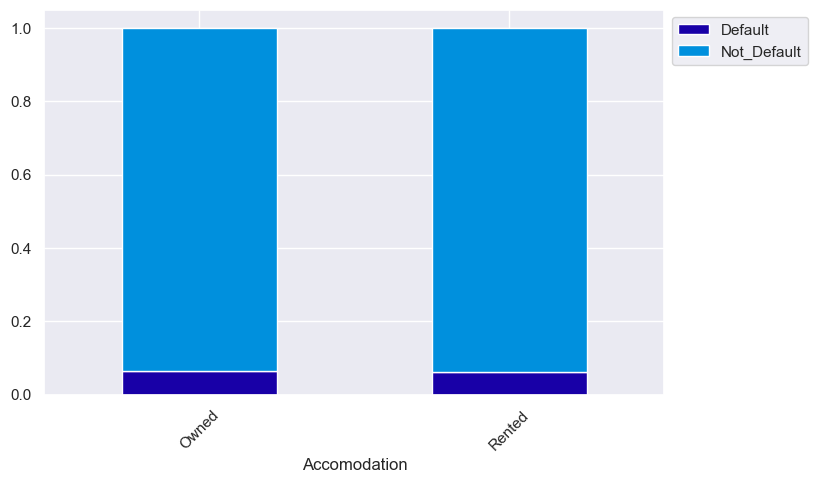

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Risk_score,,,
91 - 92,0,5,5
92 - 93,4,58,62
93 - 94,7,86,93
94 - 95,19,146,165
95 - 96,28,285,313
96 - 97,138,806,944
97 - 98,389,3053,3442
98 - 99,1687,20558,22245
99 - 100,2726,49858,52584


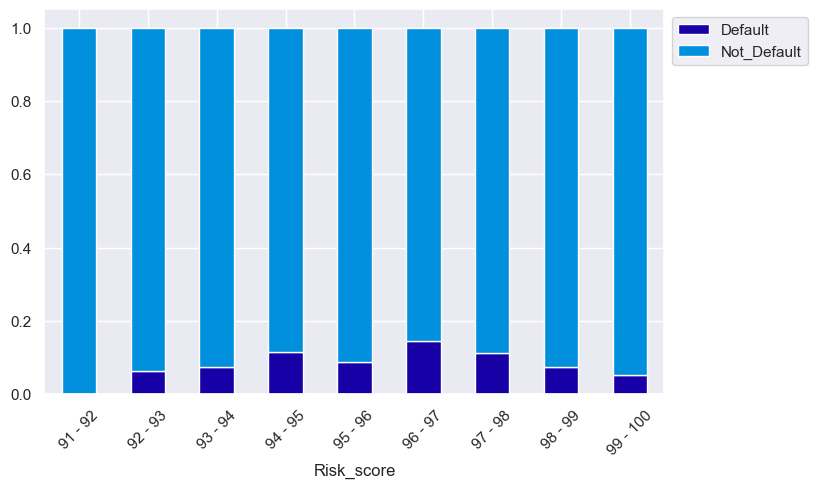

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
No_of_premiums_paid,,,
0 - 5,1046,8548,9594
5 - 10,1746,31727,33473
10 - 15,1327,22479,23806
15 - 20,618,8496,9114
>20,261,3605,3866
All,4998,74855,79853


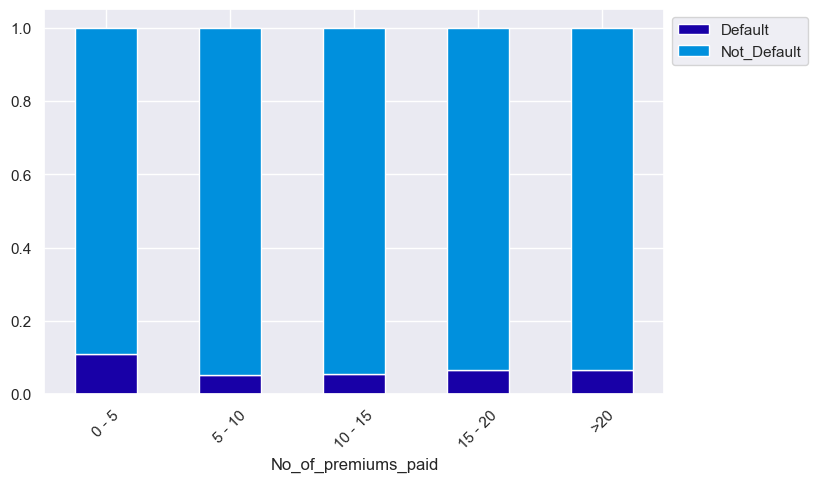

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Sourcing_channel,,,
A,2349,40785,43134
B,1066,15446,16512
C,903,11136,12039
D,634,6925,7559
E,46,563,609
All,4998,74855,79853


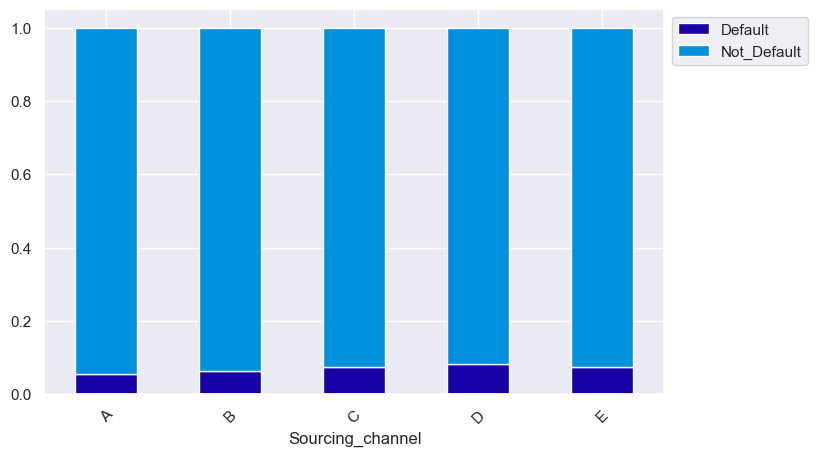

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Customer_demographic,,,
Rural,1998,29672,31670
Urban,3000,45183,48183
All,4998,74855,79853


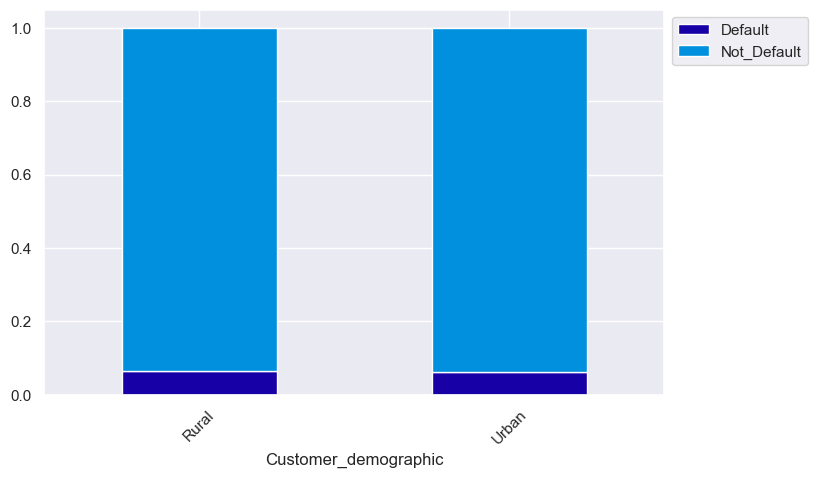

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Premium_payment,,,
0 - 5000,1211,15546,16757
5000 - 10000,2270,30346,32616
10000 - 15000,718,12662,13380
15000 - 20000,274,5619,5893
>20000,525,10682,11207
All,4998,74855,79853


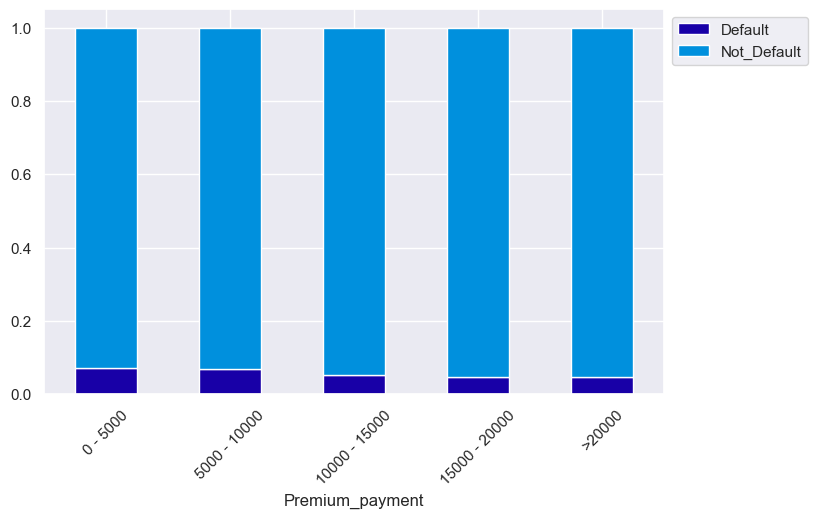

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Age_in_years,,,
20 - 30,580,4878,5458
30 - 40,1140,12578,13718
40 - 50,1483,18195,19678
50 - 60,1115,17785,18900
60 - 70,476,13442,13918
>70,204,7977,8181
All,4998,74855,79853


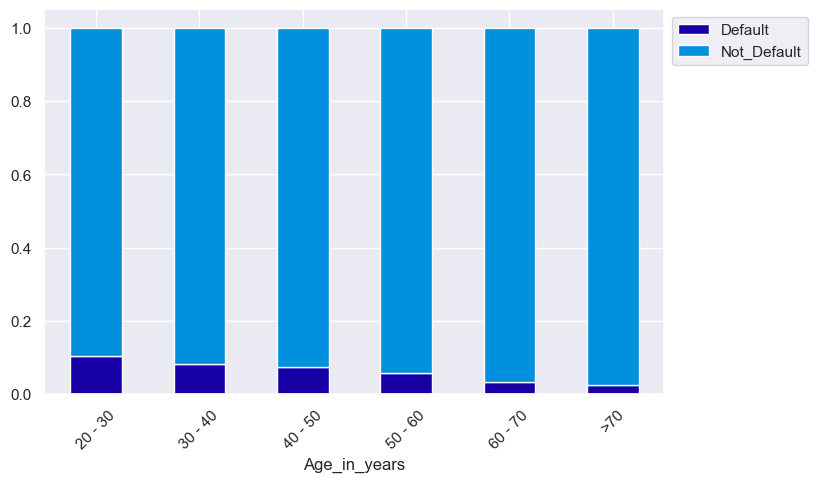

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

Default,Default,Not_Default,All
Income_'000,,,
20 - 60,459,4539,4998
60 - 100,1055,10970,12025
100 - 140,1016,13080,14096
140 - 180,731,11221,11952
180 - 220,586,9869,10455
220 - 260,346,7223,7569
260 - 300,238,4696,4934
>300,567,13257,13824
All,4998,74855,79853


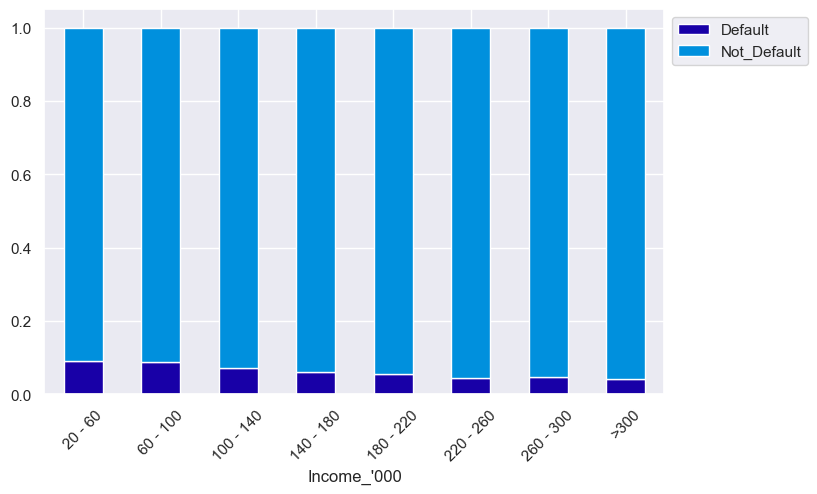

--------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [54]:
# Categorical variables
categ_list = df.columns.to_list()
categ_list.remove('Default')

for each_var in categ_list:
    stacked_plot1(df[each_var])
    plt.figure()
    plt.show()

**Observations:**
* Policy holders who paid more of their premium in cash have a higher propensity to default on their premiums.
* Policy holders who paid late tend to default on their premiums.
* Factors such as `Marital_Status`, `Vehicles_Owned`, `No_of_dependents` , `Accomodation` & `Customer_demographic` 	showed no indications of affecting a policy holder to default on their premium.
* A lower `Risk_score` indicates a higher chance of defaulting.
* Policy holders with the lowest `No_of_premiums_paid` have a higher likelihood of defaulting.
* Policy holders obtained from `Sourcing_channel` C and D have a higher chance of defaulting.
* Lower `Premium_payment` policy holders have a tendency to default.
* The youngest policy holders (age group 20-30) have the highest likelihood to default.
* The lower the income, the increasing likelihood for a policy holder to default on their payments.

---

### Correlations

#### Cramers V

In [55]:
# Install Association metrics library to access CramersV
!pip install association-metrics

In [56]:
# Import association_metrics
import association_metrics as am

**Cramer's V heatmap for categorical variables**

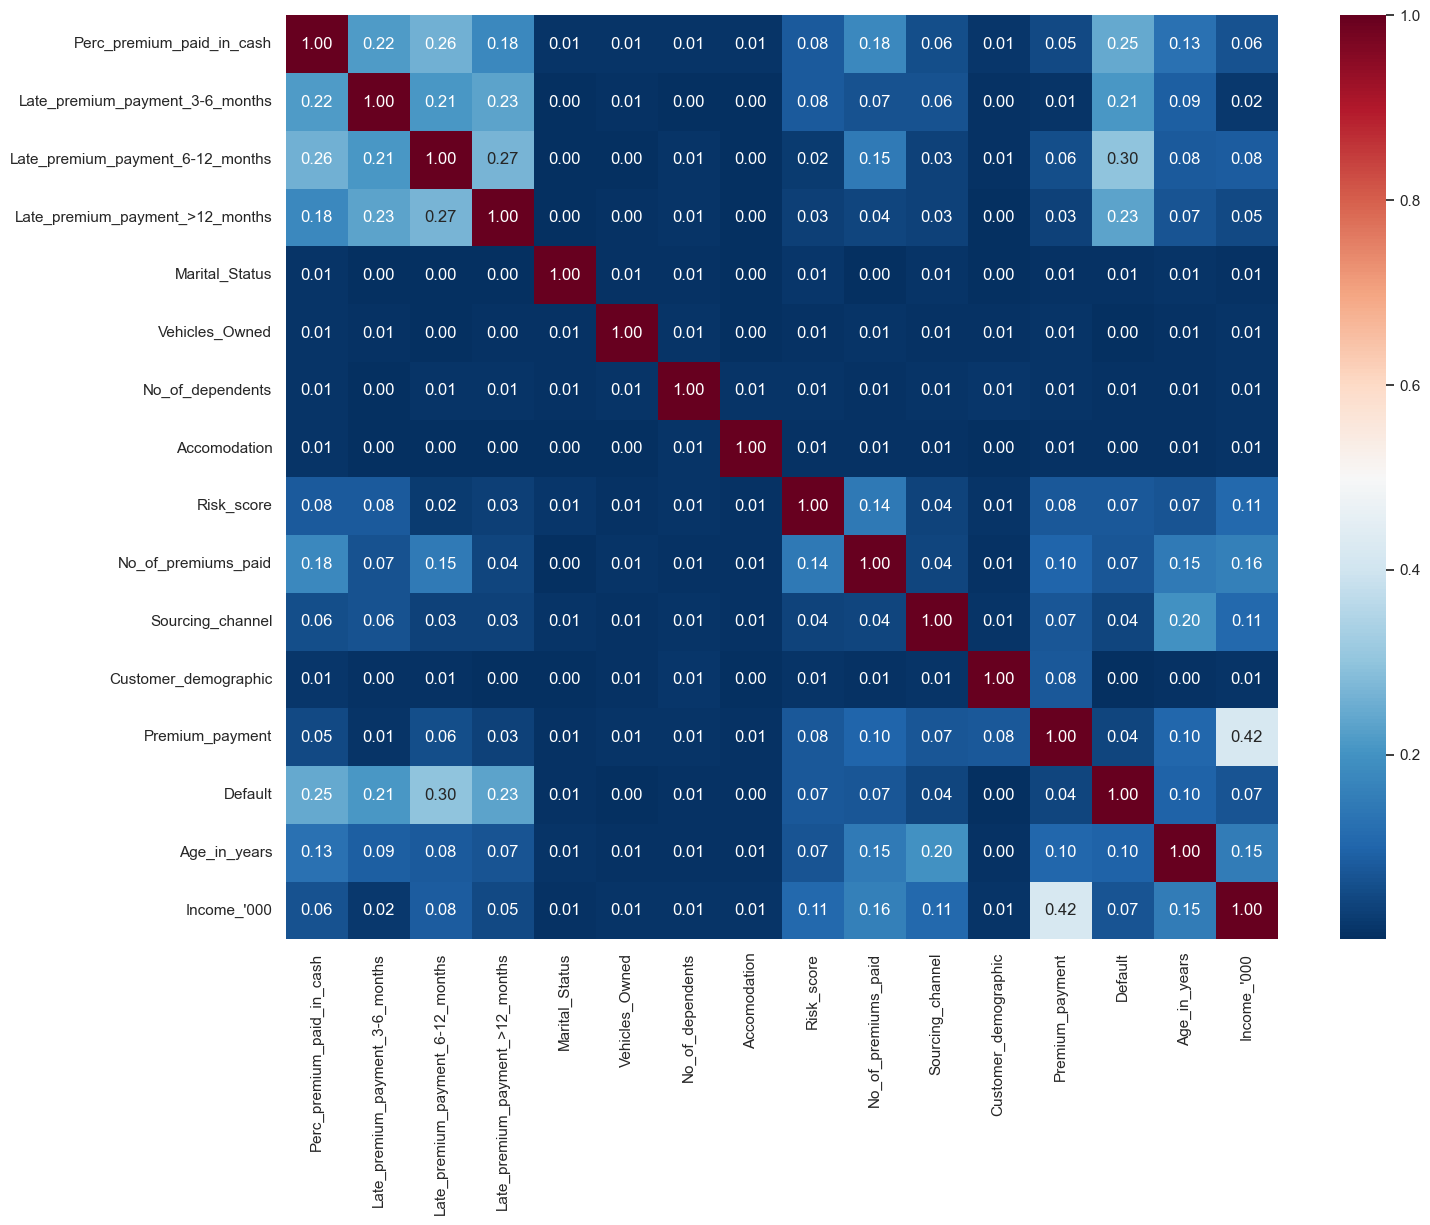

In [57]:
# Initialize CramersV object
cramersv = am.CramersV(df)
# will return a pairwise matrix filled with Cramer's V, where columns and index are
# the categorical variables of the passed pandas.DataFrame
# cramersv.fit()

plt.figure(figsize=(16, 12))
sns.heatmap(cramersv.fit(), annot=True, fmt=".2f", cmap='RdBu_r')
plt.show()

From Univariate and Bivariate analyses, we have noticed that `Marital Status`, `Number of vehicles owned`,`Number of dependents` & `Accomodation` were evenly balanced across the dataset, these variables will not provide any meaningful correlations.   
This is further shown in the heatmap above with values of 0.

Therefore let's create a subset of the variables without these variables for correlation analysis.

In [58]:
# Variables to ignore in categorical correlation analysis
variables_to_ignore = [
    'Marital_Status', 'Vehicles_Owned', 'No_of_dependents', 'Accomodation'
]
# Create a new list of columns
categ_corr_vars = df.columns.tolist()
for variables in variables_to_ignore:
    categ_corr_vars.remove(variables)
print(categ_corr_vars)

['Perc_premium_paid_in_cash', 'Late_premium_payment_3-6_months', 'Late_premium_payment_6-12_months', 'Late_premium_payment_>12_months', 'Risk_score', 'No_of_premiums_paid', 'Sourcing_channel', 'Customer_demographic', 'Premium_payment', 'Default', 'Age_in_years', "Income_'000"]


**Cramer's V heatmap for subset of variables**

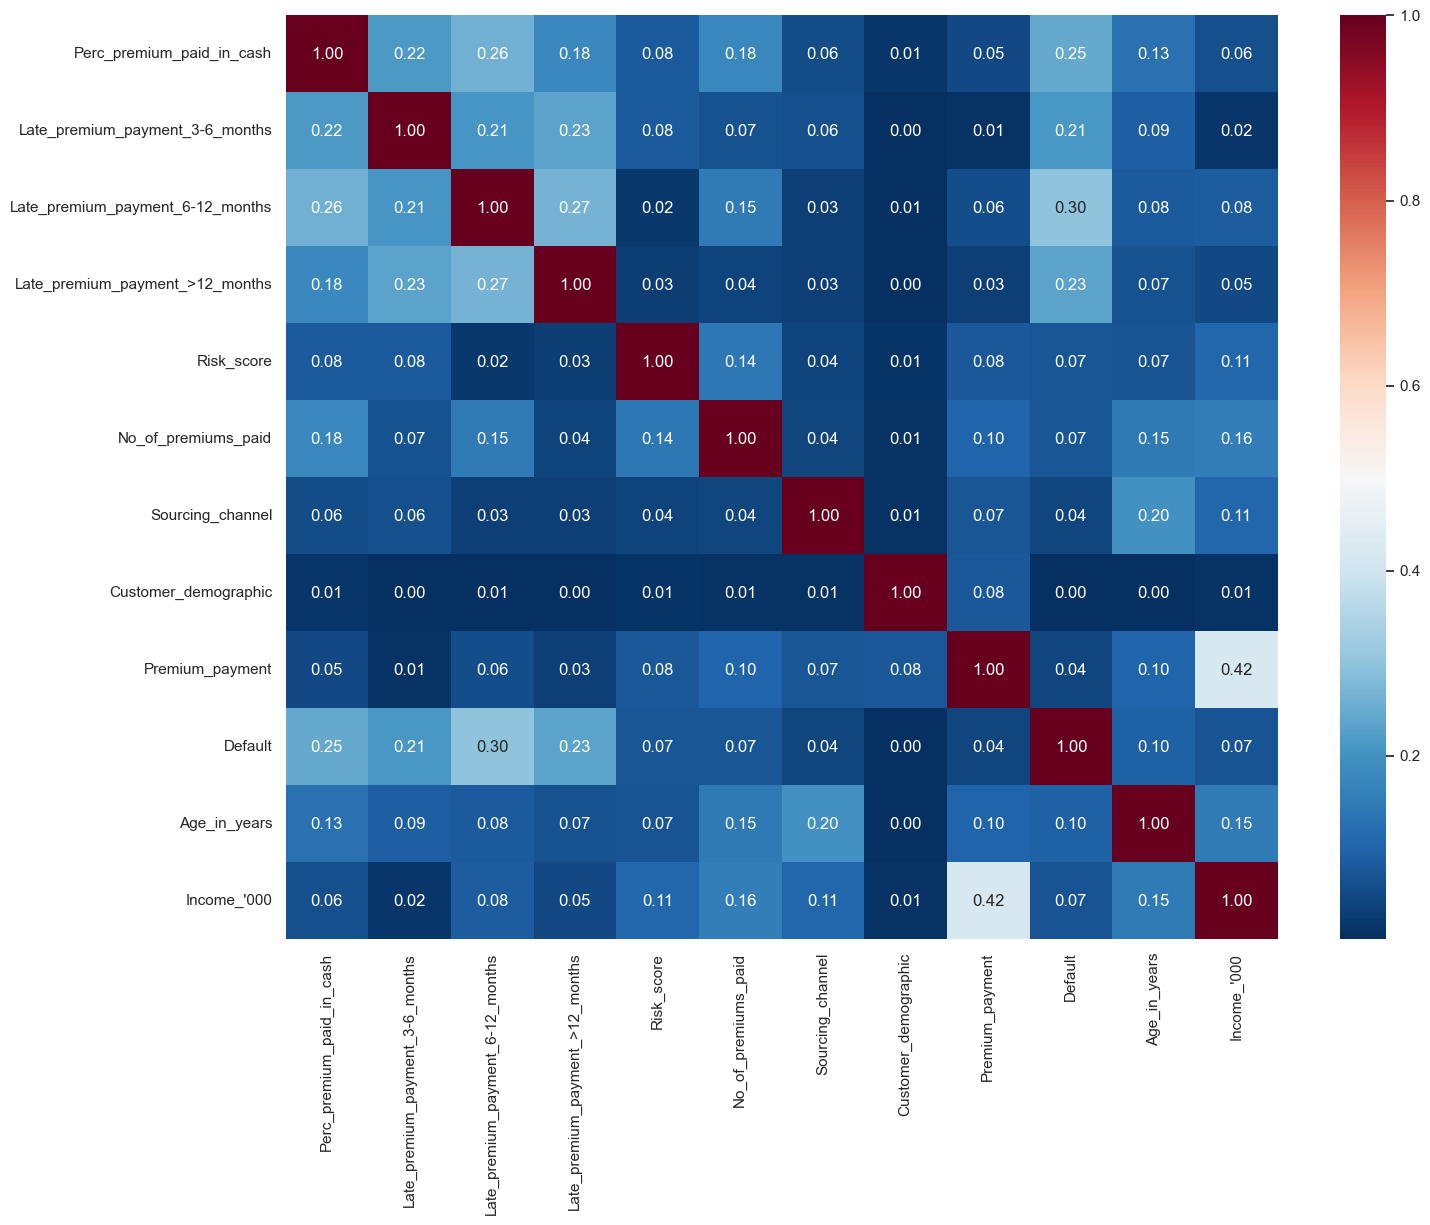

In [59]:
# Initialize CramersV object
cramersv1 = am.CramersV(df[categ_corr_vars])
# will return a pairwise matrix filled with Cramer's V, where columns and index are
# the categorical variables of the passed pandas.DataFrame
# cramersv.fit()

plt.figure(figsize=(16, 12))
sns.heatmap(cramersv1.fit(), annot=True, fmt=".2f", cmap='RdBu_r')
plt.show()

**Observations:**
* There is a moderate positive correlation with **Income_'000** and **Premium_payment**
* There is a weak positive correlation with **Default** and **Late_premium_payment_6-12_months**

---

## Analytical Approach

This project consists of 17 variables in which there is a Target Variable which will be used for predictive model building.
The Target Variable (Default) is dichotomous in nature, i.e., 0 - Default & 1 - Non Default.

This implies that this project will be a **Supervised Learning** with the application of **Classification** prediction models

The following methods will be used and compared in the model building process:
1. Logistic Regression
2. Decision Trees
3. Bootstrap Aggregation (Bagging) Ensemble methods
4. Boosting Ensemble methods

The metrics across each method will compared along with the execution time.

Also since the Target Variable (Default) is heavily imbalanced, the models will be executed with and without upsampling as well.

---